In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [48]:

# Loading in the cleaned DF
with open("df.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    

df.drop('ID',
  axis='columns', inplace=True)
# df1
df

,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
0,Fun. Talkative.,9,5,4,3,6,7,2,5
1,Procrastinator. Sporty. Intuitive.,0,8,2,9,6,2,0,5
2,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,5,2,2,8,9,1,8,5
3,Nothing.,5,2,0,1,3,9,2,6
4,Bold. Hardworking. Funny.,0,0,0,5,7,1,2,5
...,...,...,...,...,...,...,...,...,...
96,Confident. Geek. Dreamer.,2,3,5,7,0,3,8,6
97,Extrovert.,0,9,4,7,1,2,8,5
98,Learner.,0,2,0,9,6,7,2,5
99,No.,0,2,0,5,0,9,6,5


## Scaling the categories

In [6]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
0,Fun. Talkative.,1.000000,0.555556,0.444444,0.333333,0.666667,0.777778,0.222222,0.714286
1,Procrastinator. Sporty. Intuitive.,0.000000,0.888889,0.222222,1.000000,0.666667,0.222222,0.000000,0.714286
2,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,0.555556,0.222222,0.222222,0.888889,1.000000,0.111111,0.888889,0.714286
3,Nothing.,0.555556,0.222222,0.000000,0.111111,0.333333,1.000000,0.222222,0.857143
4,Bold. Hardworking. Funny.,0.000000,0.000000,0.000000,0.555556,0.777778,0.111111,0.222222,0.714286
...,...,...,...,...,...,...,...,...,...
96,Confident. Geek. Dreamer.,0.222222,0.333333,0.555556,0.777778,0.000000,0.333333,0.888889,0.857143
97,Extrovert.,0.000000,1.000000,0.444444,0.777778,0.111111,0.222222,0.888889,0.714286
98,Learner.,0.000000,0.222222,0.000000,1.000000,0.666667,0.777778,0.222222,0.714286
99,No.,0.000000,0.222222,0.000000,0.555556,0.000000,1.000000,0.666667,0.714286


In [7]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adaptable,adventures,adventurous,ambitious,ambivert,artist,artistic,athletic,awesome,bangalore,...,thinker,thoughtful,traveler,traveling,truthful,tv,understanding,uninteresting,visiting,vivacious
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movie,TV,Music,Book,Sport,Vacation,People,Branch,adaptable,adventures,...,thinker,thoughtful,traveler,traveling,truthful,tv,understanding,uninteresting,visiting,vivacious
0,1.000000,0.555556,0.444444,0.333333,0.666667,0.777778,0.222222,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.888889,0.222222,1.000000,0.666667,0.222222,0.000000,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.555556,0.222222,0.222222,0.888889,1.000000,0.111111,0.888889,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.555556,0.222222,0.000000,0.111111,0.333333,1.000000,0.222222,0.857143,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.000000,0.555556,0.777778,0.111111,0.222222,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.222222,0.333333,0.555556,0.777778,0.000000,0.333333,0.888889,0.857143,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.000000,1.000000,0.444444,0.777778,0.111111,0.222222,0.888889,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.000000,0.222222,0.000000,1.000000,0.666667,0.777778,0.222222,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0.000000,0.222222,0.000000,0.555556,0.000000,1.000000,0.666667,0.714286,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
# plt.style.use("bmh")
# plt.figure(figsize=(14,4))
# plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
# plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.72])
n_to_reach_99 = new_df.shape[1] - n_over_99
n_to_reach_99

# print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

101

In [10]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

1.0000000000000002

## HAC

In [11]:
# Finding optimum cluster
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

<ipython-input-11-b928cdf3228a>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


In [12]:
# plotting evaluation score for different matrices
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

Max Value:
Cluster #    Cluster Score
2       4.551686

Min Value:
Cluster #     Cluster Score
19       3.178357


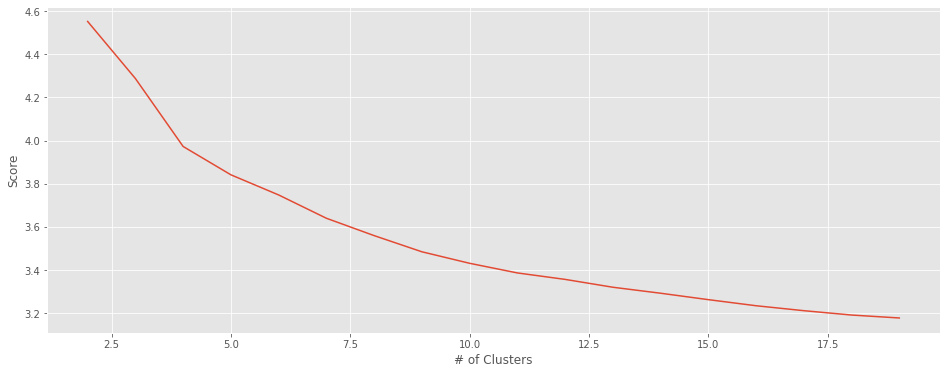

In [13]:
# Calinski harbasz
plot_evaluation(ch_scores)

Max Value:
Cluster #     Cluster Score
19       0.040588

Min Value:
Cluster #    Cluster Score
2      -0.043238


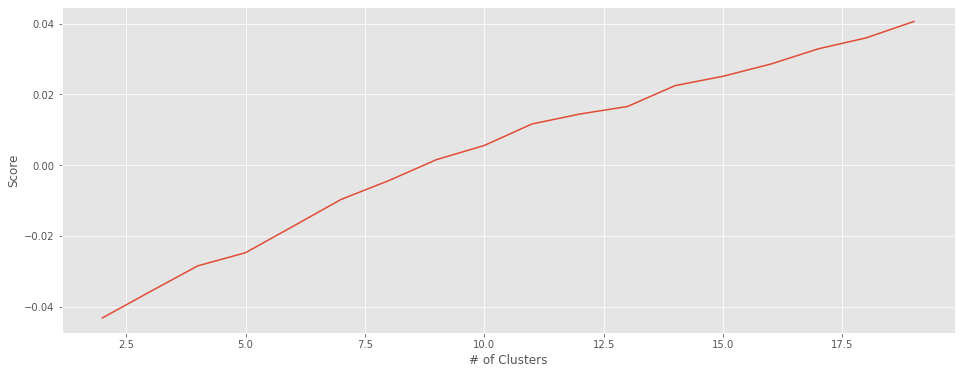

In [14]:
# Silhoutte coefficient
plot_evaluation(s_scores)

Max Value:
Cluster #    Cluster Score
4       3.286286

Min Value:
Cluster #     Cluster Score
19       1.911918


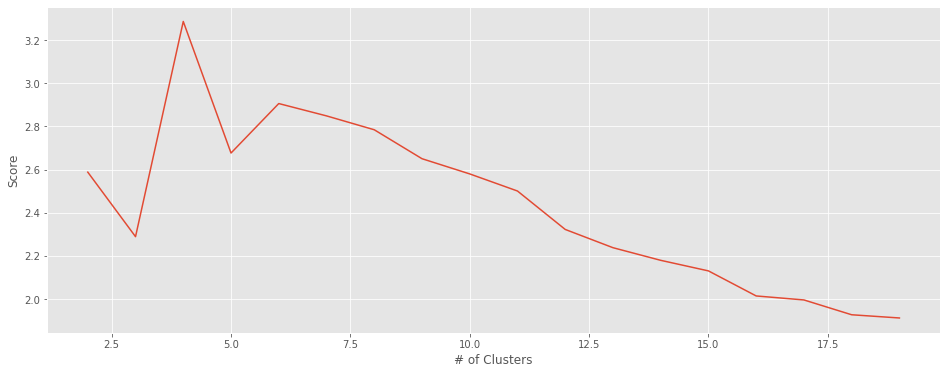

In [15]:
# Davs Boudin
plot_evaluation(db_scores)

## Best cluster number is 19

In [16]:
# running final clustering
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=19)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_


In [17]:
# Unscaling the categories then replacing the scaled values
# Loading in the cleaned DF
with open("df.pkl",'rb') as fp:
    df = pickle.load(fp)
df

,ID,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
0,19BCE0370,Fun. Talkative.,9,5,4,3,6,7,2,5
1,19BCE0148,Procrastinator. Sporty. Intuitive.,0,8,2,9,6,2,0,5
2,20BCE2014,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,5,2,2,8,9,1,8,5
3,20BEC0414,Nothing.,5,2,0,1,3,9,2,6
4,20BCE0684,Bold. Hardworking. Funny.,0,0,0,5,7,1,2,5
...,...,...,...,...,...,...,...,...,...,...
96,20BEC0298,Confident. Geek. Dreamer.,2,3,5,7,0,3,8,6
97,20BCE2663,Extrovert.,0,9,4,7,1,2,8,5
98,20BCI0088,Learner.,0,2,0,9,6,7,2,5
99,20BCE2006,No.,0,2,0,5,0,9,6,5


In [18]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,ID,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch,Cluster #
0,19BCE0370,Fun. Talkative.,9,5,4,3,6,7,2,5,7
1,19BCE0148,Procrastinator. Sporty. Intuitive.,0,8,2,9,6,2,0,5,6
2,20BCE2014,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,5,2,2,8,9,1,8,5,6
3,20BEC0414,Nothing.,5,2,0,1,3,9,2,6,16
4,20BCE0684,Bold. Hardworking. Funny.,0,0,0,5,7,1,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...
96,20BEC0298,Confident. Geek. Dreamer.,2,3,5,7,0,3,8,6,5
97,20BCE2663,Extrovert.,0,9,4,7,1,2,8,5,7
98,20BCI0088,Learner.,0,2,0,9,6,7,2,5,8
99,20BCE2006,No.,0,2,0,5,0,9,6,5,8


In [19]:
with open("clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

In [24]:
# finding users within own clusters
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

For Cluster Group # 16


,ID,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
3,20BEC0414,Nothing.,5,2,0,1,3,9,2,6
23,19bce0908,Nothing.,4,2,1,6,2,0,8,5
26,19BCE2202,Nothing.,0,0,3,0,0,0,0,5
33,21BAM0024,Nothing.,6,9,9,4,8,9,9,5
39,19BCE0444,Nothing.,5,0,0,5,0,5,6,5
42,19BCT0215,Nothing.,1,0,0,0,4,9,6,5
45,19BCB0119,Nothing.,5,9,0,9,0,3,8,5
53,19MIS0405,Nothing.,9,9,0,9,0,9,6,5
54,19BCE2273,Nothing.,5,2,0,9,1,8,8,5
58,20BCE0155,Nothing.,5,2,0,0,2,3,6,5


In [25]:
#vectrizing bio in selected cluster
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,nothing
3,1
23,1
26,1
33,1
39,1
42,1
45,1
53,1
54,1
58,1


In [26]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)
group.drop('ID', axis=1, inplace=True)

# Viewing the new DF
group

,Movie,TV,Music,Book,Sport,Vacation,People,Branch,nothing
3,5,2,0,1,3,9,2,6,1
23,4,2,1,6,2,0,8,5,1
26,0,0,3,0,0,0,0,5,1
33,6,9,9,4,8,9,9,5,1
39,5,0,0,5,0,5,6,5,1
42,1,0,0,0,4,9,6,5,1
45,5,9,0,9,0,3,8,5,1
53,9,9,0,9,0,9,6,5,1
54,5,2,0,9,1,8,8,5,1
58,5,2,0,0,2,3,6,5,1


In [27]:
# finding correlation 
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

print(corr_group)

          3         23        26        33        39        42        45  \
3   1.000000 -0.167499  0.047721  0.189697  0.504008  0.755629 -0.033786   
23 -0.167499  1.000000  0.000000 -0.070308  0.651725  0.031792  0.672951   
26  0.047721  0.000000  1.000000 -0.168982 -0.026207  0.000000 -0.263927   
33  0.189697 -0.070308 -0.168982  1.000000 -0.082244  0.342904  0.063106   
39  0.504008  0.651725 -0.026207 -0.082244  1.000000  0.493128  0.500971   
42  0.755629  0.031792  0.000000  0.342904  0.493128  1.000000 -0.099695   
45 -0.033786  0.672951 -0.263927  0.063106  0.500971 -0.099695  1.000000   
53  0.441061  0.315993 -0.378412  0.129550  0.621170  0.126923  0.798118   
54  0.426334  0.596419 -0.260208  0.025126  0.913787  0.468944  0.634434   
58  0.532226  0.514087  0.062017  0.214087  0.633866  0.560595  0.293845   
65  0.773758  0.082454 -0.204465 -0.038500  0.696598  0.362102  0.260568   
70  0.275918  0.532872  0.074587 -0.379714  0.660690 -0.102432  0.338506   
71  0.497420

## Finding the top user

In [67]:
random_user = random.choice(corr_group.index)

print(random_user)

print("The most similar user to User #", random_user, '\n')

top_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:2]

print(top_sim)


45
The most similar user to User # 45 

          45
53  0.798118
